In [1]:
import numpy as np
from sklearn import datasets, model_selection, naive_bayes
import matplotlib.pyplot as plt
%matplotlib inline

vector from images 0: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


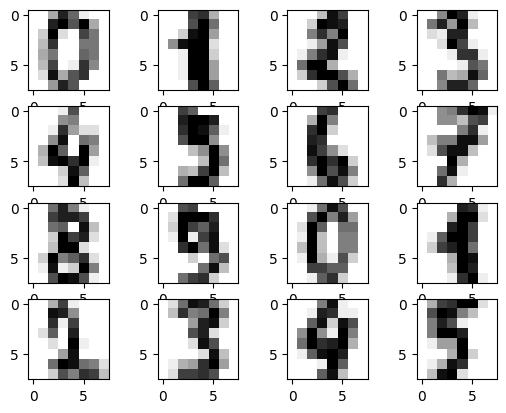

In [2]:
#从 sklearn 库中载入 digits 数据集
digits = datasets.load_digits()
fig = plt.figure()
#digits.data 和 digits.images 之间没有差异。两者都包含一些 8 * 8 图像的像素值。第一个是（1797，64）numpy.ndarray，而第二个是（1797,8,8）numpy.ndarray。唯一的区别是digits.images[i]是 digits.data[i]的 8 * 8 重塑，它更适合可视化。
print('vector from images 0:',digits.data[0])
#查看前 16 张图片
for i in range(16): 
 #以 4 * 4 的格式呈现
 ax = fig.add_subplot(4,4,i+1)
 #使用灰度,进行插值图像分辨率
 ax.imshow(digits.images[i],cmap=plt.cm.gray_r,interpolation='nearest')
plt.show()

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data, digits.target,
 #以 75:25的比例分割训练集和测试集 
test_size=0.25,  
random_state=0)

In [4]:
#创建一个名为 cls1 的 GaussianNB 实例
cls1 = naive_bayes.GaussianNB()
#利用 GaussianNB 模型训练 X_train 和 Y_train
cls1.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [5]:
#查看模型在训练集上的预测准确度
print('Training Score:%.2f' % cls1.score(X_train,y_train))
#查看模型在测试集上的预测准确度
print('Testing Score:%.2f' % cls1.score(X_test,y_test))

Training Score:0.86
Testing Score:0.83


In [6]:
#创建一个名为 cls 的 BernoulliNB 实例
cls3 = naive_bayes.BernoulliNB()
#利用 BernoulliNB 模型训练 X_train 和 Y_train
cls3.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [7]:
#查看模型在训练集上的预测准确度 
print('Training Score:%.2f' % cls3.score(X_train,y_train)) 
#查看模型在测试集上的预测准确度 
print('Testing Score:%.2f' % cls3.score(X_test,y_test))


Training Score:0.87
Testing Score:0.85


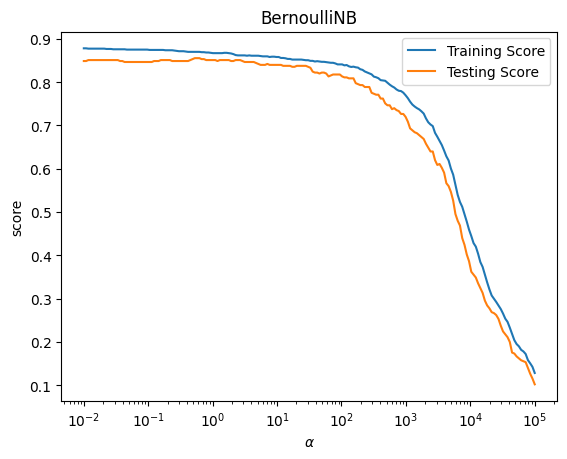

In [8]:
#[-2,5]构造等比数列构造 200 个 alpha 数值
alphas = np.logspace(-2,5,num=200)
train_scores = []
test_scores = []
#用以上 alpha 值依次训练伯努利贝叶斯分类器
for alpha in alphas:
 cls = naive_bayes.BernoulliNB(alpha=alpha)
 #拟合模型
 cls.fit(X_train,y_train)
 #记录分类器在训练集上的预测准确率
 train_scores.append(cls.score(X_train,y_train))
 #记录分类器在测试集上的预测准确率
 test_scores.append(cls.score(X_test,y_test))
#绘图
fig = plt.figure()
ax = fig.add_subplot(111)
#绘制训练集准确率随 alpha 变化曲线
ax.plot(alphas,train_scores,label='Training Score')
#绘制测试集准确率随 alpha 变化曲线
ax.plot(alphas,test_scores,label='Testing Score')
#添加 x 轴名
ax.set_xlabel(r'$\alpha$')
#添加 y 轴名
ax.set_ylabel(r'score')
#添加图像名 
ax.set_title('BernoulliNB')
#对数刻度
ax.set_xscale('log')
ax.legend(loc='best')
plt.show()

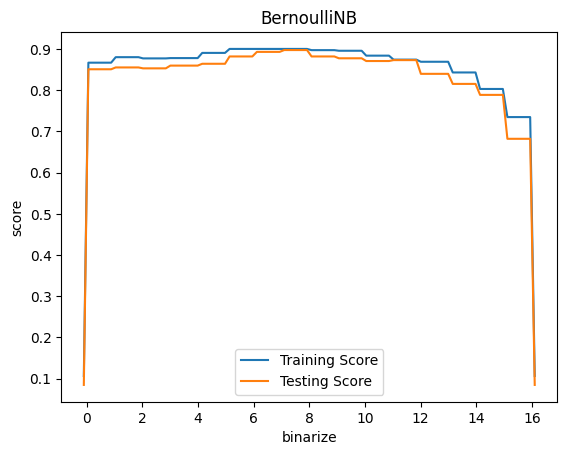

In [9]:
#获取训练集数据像素点最小值
min_x=min(np.min(X_train.ravel()),np.min(X_test.ravel()))-0.1
#获取训练集数据像素点最大值
max_x=max(np.max(X_train.ravel()),np.max(X_test.ravel()))+0.1
#创建 100 个 binarize 值，endpoint=True 包含右端点
binarizes=np.linspace(min_x,max_x,endpoint=True,num=100)
train_scores=[]
test_scores=[]
#用以上 binarize 值依次训练伯努利贝叶斯分类器
for binarize in binarizes:
 cls=naive_bayes.BernoulliNB(binarize=binarize)
 #拟合模型
 cls.fit(X_train,y_train)
 #记录分类器在训练集上的预测准确率
 train_scores.append(cls.score(X_train,y_train))
 #记录分类器在测试集上的预测准确率
 test_scores.append(cls.score(X_test,y_test))
#绘图 
fig = plt.figure()
ax = fig.add_subplot(111)
#绘制训练集准确率随 binarize 变化曲线
ax.plot(binarizes,train_scores,label='Training Score')
6
#绘制测试集准确率随 binarize 变化曲线
ax.plot(binarizes,test_scores,label='Testing Score')
#添加 x 轴名
ax.set_xlabel(r'binarize')
#添加 y 轴名
ax.set_ylabel(r'score')
#添加图像名
ax.set_title('BernoulliNB')
ax.legend(loc='best')
plt.show()